In [1]:
import tensorflow as tf
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)


In [3]:
## Remove dodgy Images

import cv2
import imghdr
import matplotlib.pyplot as plt

C:\Users\dange\AppData\Local\Temp\ipykernel_22980\1929111800.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [4]:
data_dir = 'Data'

In [5]:
os.listdir(data_dir)

['Happy People', 'Sad people']

In [6]:
img_extns = ['jpeg','jpg','bmp','png']

In [7]:
img_extns

['jpeg', 'jpg', 'bmp', 'png']

In [8]:
img_extns[2]

'bmp'

In [9]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_extns: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

In [10]:
img = cv2.imread(os.path.join('Data','Happy People','c2l6ZS84MDB4Lw2.jpeg'))

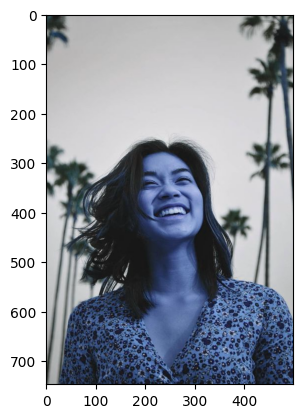

In [11]:
plt.imshow(img)

Load Data

In [12]:
import numpy as np

In [13]:
tf.keras.utils.image_dataset_from_directory('Data',batch_size=8,image_size=(128,128))

Found 214 files belonging to 2 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
data = tf.keras.utils.image_dataset_from_directory('Data')

Found 214 files belonging to 2 classes.


In [15]:
data_iterator = data.as_numpy_iterator()

In [16]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x000002173C56A1E0>)

In [17]:
batch = data_iterator.next()

In [18]:
##class 1=sad 
##class 0 =happy
batch[1]

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1])

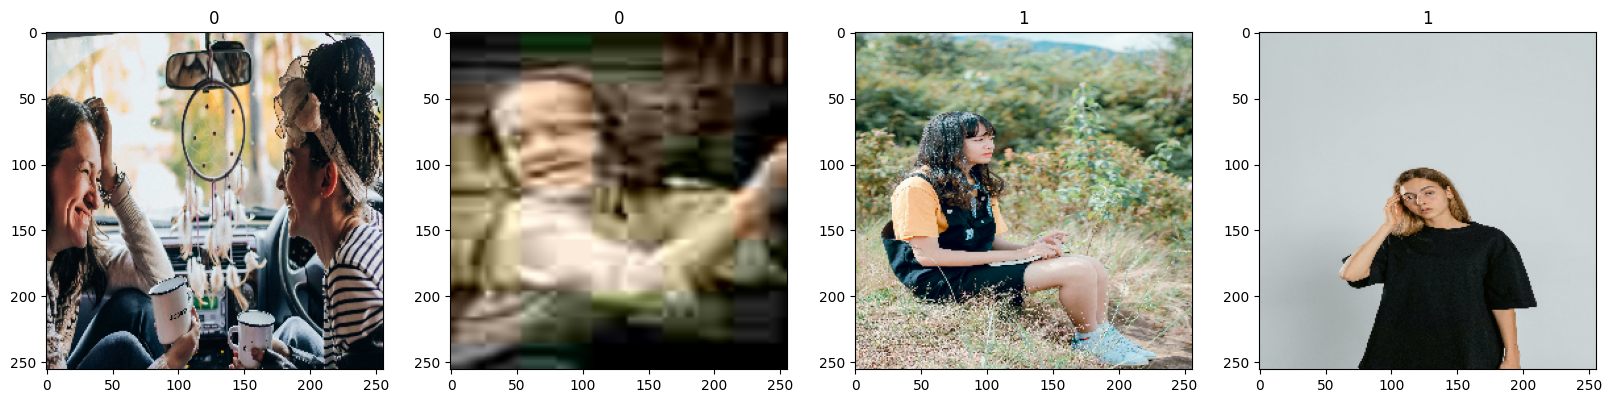

In [19]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Preprocessing Data

In [20]:
data = data.map(lambda x,y: (x/255, y))

In [24]:
data.as_numpy_iterator().next()

(array([[[[0.25882354, 0.27450982, 0.18431373],
          [0.25882354, 0.27450982, 0.18431373],
          [0.25407475, 0.26976103, 0.17956495],
          ...,
          [1.        , 0.99607843, 1.        ],
          [1.        , 0.99607843, 1.        ],
          [1.        , 0.99607843, 1.        ]],
 
         [[0.25948223, 0.2751685 , 0.18497242],
          [0.25948223, 0.2751685 , 0.18497242],
          [0.25473344, 0.27041972, 0.18022366],
          ...,
          [1.        , 0.99607843, 1.        ],
          [1.        , 0.99607843, 1.        ],
          [1.        , 0.99607843, 1.        ]],
 
         [[0.26122856, 0.27691483, 0.18671875],
          [0.26122856, 0.27691483, 0.18671875],
          [0.25647977, 0.27216604, 0.18196997],
          ...,
          [1.        , 0.99607843, 1.        ],
          [1.        , 0.99607843, 1.        ],
          [1.        , 0.99607843, 1.        ]],
 
         ...,
 
         [[0.9590074 , 0.714614  , 0.62352943],
          [0.95900

Split data

In [25]:
len(data)

7

In [29]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [31]:
val_size

2

In [32]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Deep Model

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [36]:
model = Sequential()

In [37]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\dange\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
logdir='logs'

In [42]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [43]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.5990 - loss: 1.7847 - val_accuracy: 0.5469 - val_loss: 1.2931
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.4802 - loss: 1.2127 - val_accuracy: 0.5000 - val_loss: 0.7063
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.5000 - loss: 0.7001 - val_accuracy: 0.5156 - val_loss: 0.6819
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.5844 - loss: 0.6790 - val_accuracy: 0.7188 - val_loss: 0.6555
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step - accuracy: 0.6896 - loss: 0.6565 - val_accuracy: 0.6250 - val_loss: 0.6362
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.6750 - loss: 0.6386 - val_accuracy: 0.7188 - val_loss: 0.6090
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.7479 - loss: 0.5845 - val_accuracy: 0.7500 - val_loss: 0.5509
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.6917 - loss: 0.5602 - val_accuracy: 0.7656 - val_loss: 0.5620
Epoch 9/

Plot performance

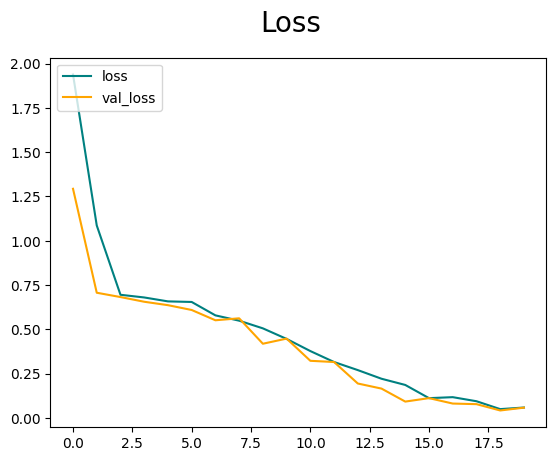

In [44]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

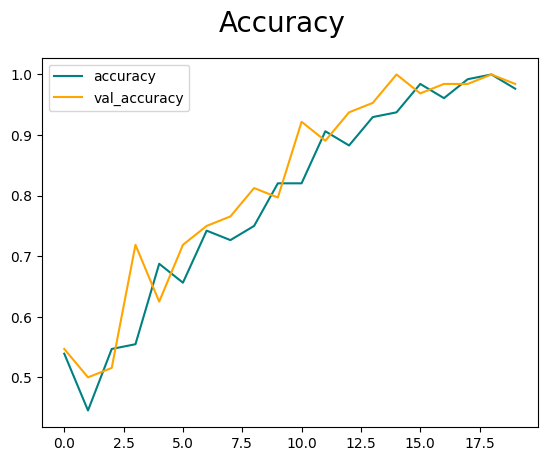

In [45]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluate perfromace

In [48]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [49]:
pre =Precision()
re = Recall()
acc = BinaryAccuracy()

In [50]:
len(test)

1

In [52]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


In [53]:
print(pre.result(), re.result(), acc.result())


tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


Test

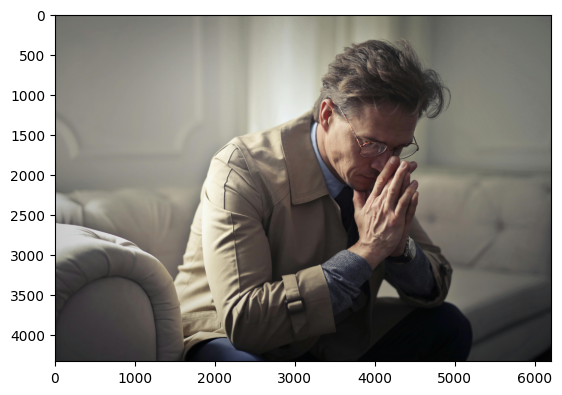

In [64]:
img = cv2.imread('sad.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

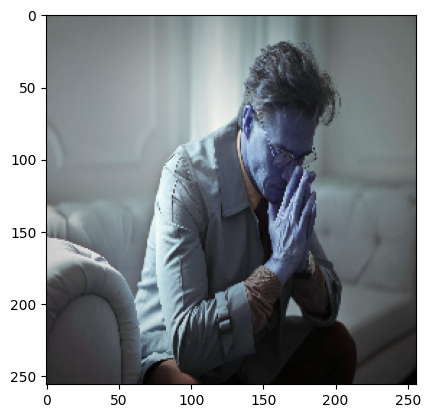

In [65]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show

In [66]:
yhat = model.predict(np.expand_dims(resize/255,0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


In [67]:
yhat

array([[0.95099103]], dtype=float32)

In [68]:
if yhat>0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


Save the model

In [69]:
from tensorflow.keras.models import load_model

In [74]:
model.save(os.path.join('models','imageclassifier.h5'))


In [76]:
os.path.join('models','imageclassifier.h5')

'models\\imageclassifier.h5'

In [77]:
new_model=  load_model(os.path.join('models','imageclassifier.h5'))

In [78]:
new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


array([[0.95099103]], dtype=float32)